# 2. Exploring Job Market Trends with Descriptive Statistics in PySpark
This notebook undertakes a thorough statistical analysis of job market data using PySpark, a robust tool renowned for its scalability and efficiency in handling large datasets. Our objective is to unearth valuable insights and trends within the dynamic job market landscape.

## Notebook Overview
- Importing Required Resources: We begin by importing all necessary resources to support our analysis. Assuming resource installation has been completed in a preceding data processing notebook, we proceed directly to import them here.

- Data Loading and Visualization: Next, we load the processed data from "processed_job_descriptions.csv" using PySpark. Through PySpark DataFrame operations, we conduct an initial data exploration.

- Descriptive Statistics: Within this section, we harness PySpark's DataFrame functionalities to explore trends in job postings by Key statistical insights were derived concerning salary, experience, company size, job title, qualifications, country, work type, portal, and preference.

Through this PySpark exploration, our objective is to furnish stakeholders with actionable insights and a comprehensive understanding of essential features for navigating the intricacies of the modern job market. Following this analysis, we anticipate gaining deeper insights into these features and the entire dataset.

### Importing Required Resources 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql.functions import col, when

findspark.init()

from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

import warnings

warnings.filterwarnings("ignore")

24/04/06 22:39:13 WARN Utils: Your hostname, Pujas-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.97 instead (on interface en0)
24/04/06 22:39:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 22:39:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Data Loading and Visualization

In [2]:
df = spark.read.option('inferSchema', True).csv('processed_job_descriptions.csv', header=True)
df.limit(3).toPandas()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Web Developer,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"""{""""Sector"""":""""Financial Services""""",56000,116000,2,12
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Operations Manager,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"""{""""Sector"""":""""Insurance""""",61000,104000,0,12


In [3]:
df.printSchema()

root
 |-- Qualifications: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: integer (nullable = true)
 |-- Job Posting Date: date (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Min Salary: integer (nullable = true)
 |-- Max Salary: integer (nullable = true)
 |-- Min Exp: integer (nullable = true)
 |-- Max Exp: integer (nullable = true)



### Descriptive Statistics

In [4]:
df.select('Min Salary').summary().show()

+-------+------------------+
|summary|        Min Salary|
+-------+------------------+
|  count|           1615940|
|   mean|60003.433914625544|
| stddev| 3163.964273393827|
|    min|             55000|
|    25%|             57000|
|    50%|             60000|
|    75%|             63000|
|    max|             65000|
+-------+------------------+



The summary statistics for the "Min Salary" column reveal important insights about the distribution of minimum salary levels within the dataset. With a total of 1,615,940 non-null values, the average minimum salary stands at approximately 60,003.43, with a standard deviation of 3,163.96, indicating moderate variability around the mean. 

The salary range spans from a minimum of 55,000 to a maximum of 65,000, with the median salary (50th percentile) positioned at 60,000. Notably, 25\% of the data points fall below 57,000, while 75\% of the data points fall below 63,000. These statistics provide a comprehensive overview of the salary distribution, aiding in understanding the typical salary landscape within the analyzed dataset.

In [5]:
df.select('Max Salary').summary().show()

+-------+------------------+
|summary|        Max Salary|
+-------+------------------+
|  count|           1615940|
|   mean|104978.87545329654|
| stddev|14717.494468338378|
|    min|             80000|
|    25%|             92000|
|    50%|            105000|
|    75%|            118000|
|    max|            130000|
+-------+------------------+



The "Max Salary" column provided valuable insights into the distribution of maximum salary levels within the dataset. With a total of 1,615,940 non-null values, the average maximum salary stands at approximately 104,978.88, with a standard deviation of 14,717.49, suggesting a moderate degree of variability around the mean. 

The range of maximum salaries extends from a minimum value of 80,000 to a maximum value of 130,000. The median maximum salary (50th percentile) is 105,000, indicating that half of the data points have maximum salaries at or below this value. Additionally, 25\% of the data points have maximum salaries below $92,000, while 75\% have maximum salaries below 118,000. These statistics offer valuable insights into the distribution and characteristics of maximum salary levels, facilitating a comprehensive understanding of the salary landscape within the analyzed dataset.

In [6]:
df.select('Min Exp').summary().show()

+-------+------------------+
|summary|           Min Exp|
+-------+------------------+
|  count|           1615940|
|   mean|2.5018076166194287|
| stddev|1.7078088766541082|
|    min|                 0|
|    25%|                 1|
|    50%|                 3|
|    75%|                 4|
|    max|                 5|
+-------+------------------+



The summary statistics for the "Min Exp" (Minimum Experience) column offer insightful observations about the distribution of minimum experience levels within the dataset. With a total count of 1,615,940 non-null values, the average minimum experience stands at approximately 2.50 years, accompanied by a standard deviation of approximately 1.71 years. 

The range of minimum experience extends from a minimum value of 0 years to a maximum value of 5 years. The median minimum experience (50th percentile) is 3 years, indicating that half of the data points have minimum experience levels at or below this value. Furthermore, 25% of the data points have minimum experience levels below 1 year, while 75% have minimum experience levels below 4 years. These statistics provide valuable insights into the distribution and characteristics of minimum experience levels, aiding in the understanding of the experience landscape within the analyzed dataset.

In [14]:
df.select('Max Exp').summary().show()

+-------+------------------+
|summary|           Max Exp|
+-------+------------------+
|  count|           1615940|
|   mean|11.497981979528943|
| stddev|2.2919328025175396|
|    min|                 8|
|    25%|                 9|
|    50%|                11|
|    75%|                13|
|    max|                15|
+-------+------------------+



The summary statistics for the "Max Exp" (Maximum Experience) column provide significant insights into the distribution of maximum experience levels within the dataset. With a total count of 1,615,940 non-null values, the average maximum experience is approximately 11.50 years, with a standard deviation of around 2.29 years, indicating a moderate degree of variability around the mean. 

The range of maximum experience spans from a minimum value of 8 years to a maximum value of 15 years. The median maximum experience (50th percentile) is 11 years, suggesting that half of the data points have maximum experience levels at or below this value. Additionally, 25% of the data points have maximum experience levels below 9 years, while 75% have maximum experience levels below 13 years. These statistics offer valuable insights into the distribution and characteristics of maximum experience levels, aiding in the understanding of the experience landscape within the analyzed dataset.

In [24]:
df.select('Company Size').summary().show()

+-------+------------------+
|summary|      Company Size|
+-------+------------------+
|  count|           1615940|
|   mean| 73704.67154597324|
| stddev|35298.863912001594|
|    min|             12646|
|    25%|             43114|
|    50%|             73630|
|    75%|            104295|
|    max|            134834|
+-------+------------------+



The average company size is around 73,704 employees, with a notable variability indicated by a standard deviation of approximately 35,299. Company sizes range from a minimum of 12,646 to a maximum of 134,834 employees. The quartile values illustrate the distribution, with 25% of companies having 43,114 employees or fewer, and 75% having 104,295 employees or fewer.


It appears that the majority of companies posting jobs are quite large in size!

## Job Title

Number of Job Titles: 147


+-----------------------------------+-----+
|Job Title                          |count|
+-----------------------------------+-----+
|UX/UI Designer                     |48551|
|Digital Marketing Specialist       |27975|
|Software Engineer                  |27630|
|Network Engineer                   |24393|
|Software Tester                    |20945|
|Executive Assistant                |20776|
|Procurement Manager                |20734|
|Financial Advisor                  |20687|
|Sales Representative               |17664|
|Social Media Manager               |17613|
|Network Administrator              |17581|
|Administrative Assistant           |17484|
|Data Analyst                       |17402|
|Event Planner                      |17384|
|Procurement Specialist             |17348|
|Purchasing Agent                   |17286|
|Systems Administrator              |17281|
|HR Coordinator                     |17260|
|Customer Support Specialist        |17259|
|Legal Assistant                

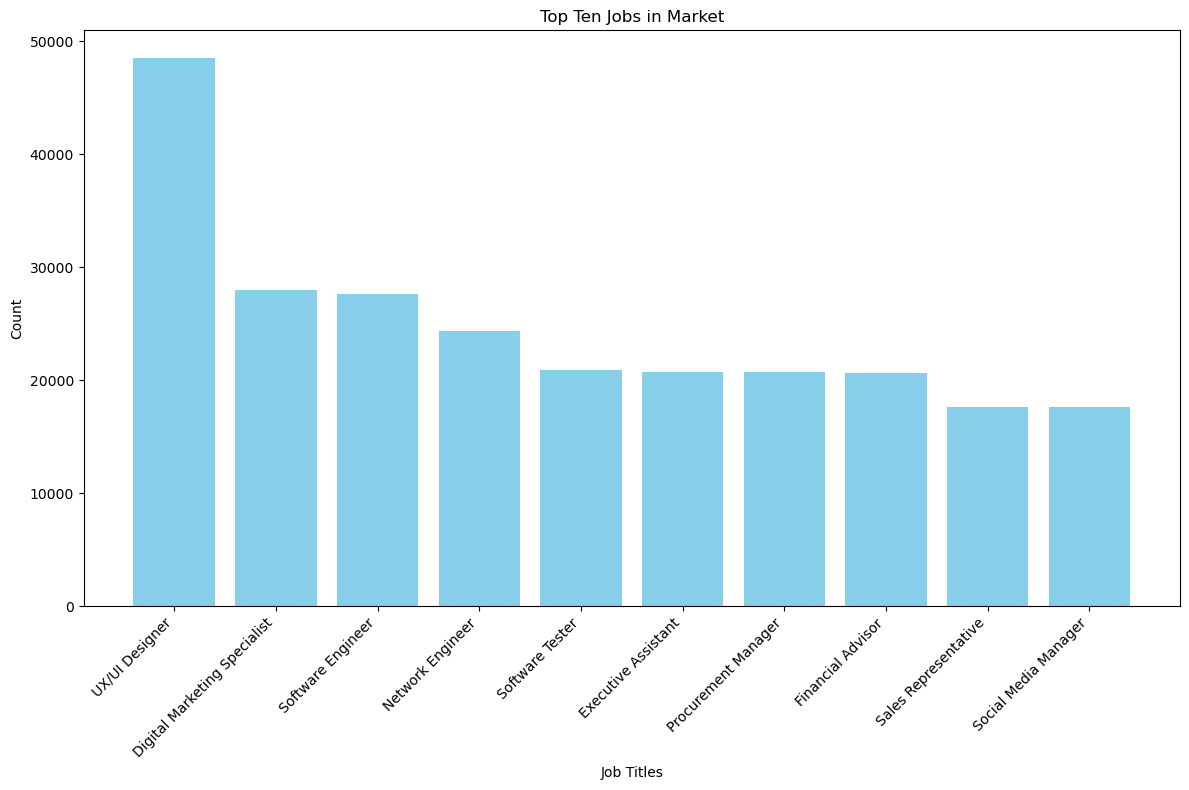

In [5]:
# Group by Job Title and count occurrences
job_title_counts = df.groupBy("Job Title").count().orderBy(col("count").desc())

# Count the number of unique job titles
num_job_titles = job_title_counts.count()

# Print the number of unique job titles
print("Number of Job Titles:", num_job_titles)

# Show the Job Title counts
job_title_counts.show(job_title_counts.count(), truncate=False)

# Collect the data of the top ten job titles
top_ten_job_titles = job_title_counts.limit(10).collect()

# Prepare the data for plotting
job_titles = [row["Job Title"] for row in top_ten_job_titles]
job_counts = [row["count"] for row in top_ten_job_titles]

plt.figure(figsize=(12, 8))
plt.bar(job_titles, job_counts, color='skyblue')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Top Ten Jobs in Market')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_jobs.png')
plt.show()

The job titles dataset provides an insightful overview of the most sought-after roles across various industries. There sre total 147 types of unique job positions in this dataset. Positions like UX/UI Designer, Digital Marketing Specialist, and Software Engineer emerge as the top roles with the highest counts of job postings, indicating their significance in today's job market. These roles often require specialized skills and expertise in fields such as technology, marketing, and design. Additionally, the dataset reflects the diversity of job opportunities available, ranging from administrative roles like Executive Assistant and Administrative Assistant to technical roles like Network Engineer and Software Tester. Analyzing these job titles can offer valuable insights into industry trends, skill demands, and potential career paths for job seekers and employers alike.

## Qualifications

Total Types of Required Degrees: 10


+--------------+------+
|Qualifications| count|
+--------------+------+
|           BBA|162148|
|            BA|162138|
|           BCA|161733|
|        M.Tech|161719|
|           PhD|161662|
|           MBA|161537|
|        B.Tech|161443|
|         M.Com|161396|
|         B.Com|161298|
|           MCA|160866|
+--------------+------+



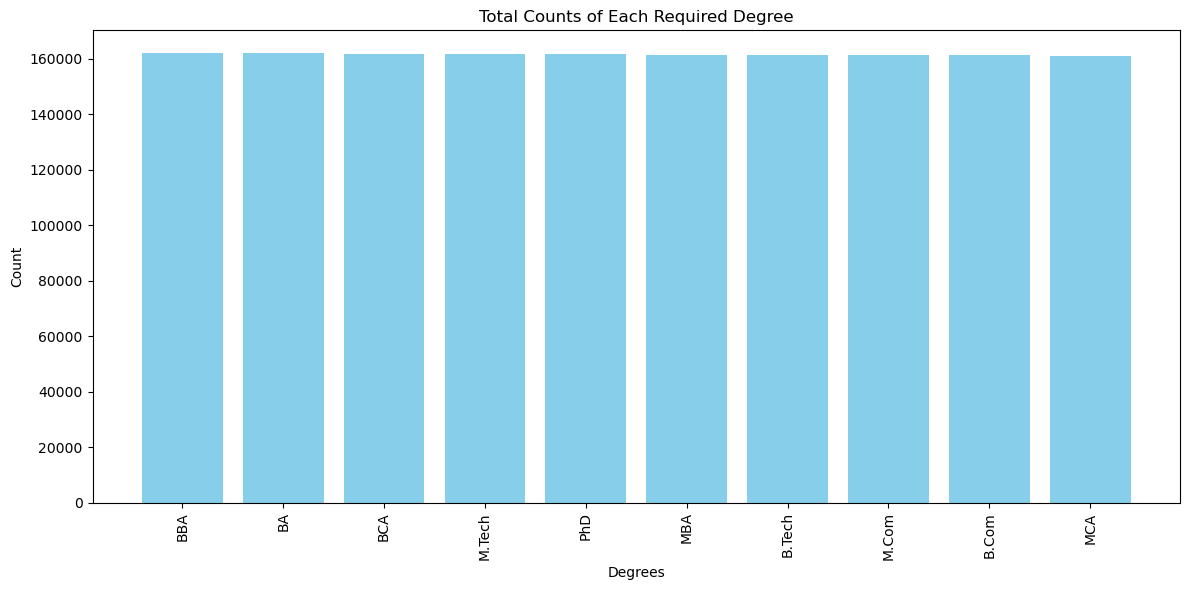

In [7]:
degree_counts = df.groupBy("Qualifications").count().orderBy(col("count").desc())

num_degrees = degree_counts.count()

print("Total Types of Required Degrees:", num_degrees)
degree_counts.show()

# Collecting the data for all degrees
all_degrees_data = degree_counts.limit(degree_counts.count()).rdd.collect()

# Extracting degree names and counts
degrees = [row["Qualifications"] for row in all_degrees_data]
counts = [row["count"] for row in all_degrees_data]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(degrees, counts, color='skyblue')
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title('Total Counts of Each Required Degree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The qualifications distribution indicates variations in the prevalence of different academic backgrounds among job postings. Total 10 types of degrees are required in entire dataset. Degrees like BBA, BA, and BCA are among the most commonly sought qualifications, each accounting for over 160,000 job postings. In contrast, specialized degrees such as M.Tech and PhD show slightly lower counts but still remain prevalent, with around 161,700 and 161,600 postings, respectively. Notably, more general degrees like MBA and B.Tech also exhibit high representation in the job market, each with over 161,000 postings. Understanding the distribution of qualifications can provide insights into the educational requirements and preferences of employers across various industries, informing career decisions and educational pursuits for job seekers.

## Country

Total Number of Countries: 216


+------------------------------+-----+
|Country                       |count|
+------------------------------+-----+
|Malta                         |7723 |
|Venezuela, RB                 |7694 |
|Somalia                       |7689 |
|Sierra Leone                  |7656 |
|Sri Lanka                     |7649 |
|Vietnam                       |7649 |
|Azerbaijan                    |7643 |
|San Marino                    |7638 |
|Turkmenistan                  |7633 |
|Rwanda                        |7630 |
|Sweden                        |7626 |
|North Korea                   |7618 |
|Mexico                        |7617 |
|Fiji                          |7612 |
|Liberia                       |7605 |
|Senegal                       |7604 |
|Kiribati                      |7604 |
|Guinea                        |7604 |
|Pakistan                      |7600 |
|Georgia                       |7599 |
|Peru                          |7597 |
|Tanzania                      |7597 |
|Bangladesh              

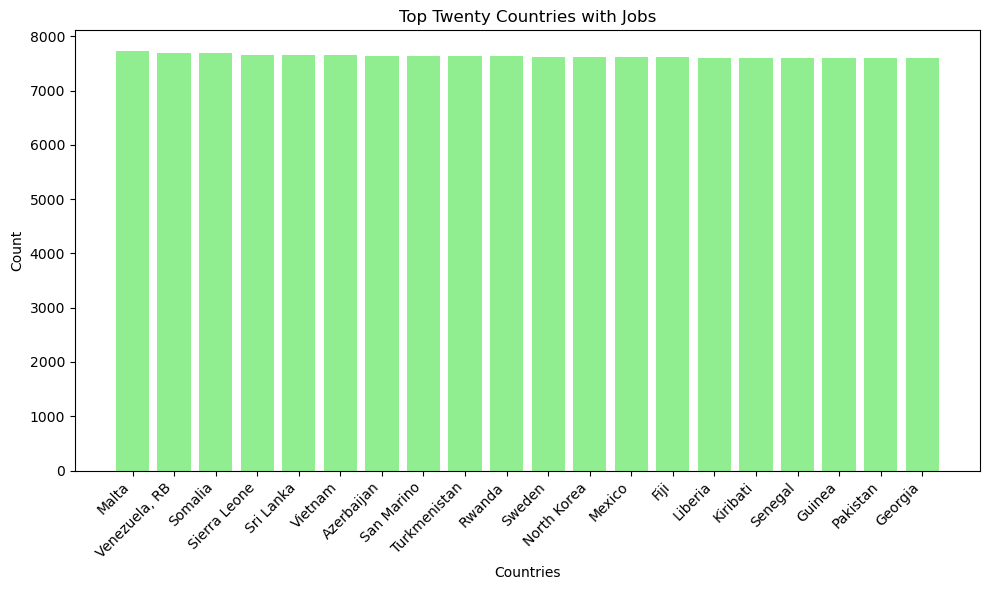

In [8]:
Country_counts = df.groupBy("Country").count().orderBy(col("count").desc())
num_countries = Country_counts.count()

# Print the number of countries and job count in each country
print("Total Number of Countries:", num_countries)
Country_counts.show(Country_counts.count(), truncate=False)

# Collect the data of the top five countries
top_twenty_countries = Country_counts.limit(20).rdd.collect()

# Prepare the data for plotting
countries = [row["Country"] for row in top_twenty_countries]
country_counts = [row["count"] for row in top_twenty_countries]

# Plot the data using PySpark's plotting capabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(countries, country_counts, color='lightgreen')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top Twenty Countries with Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The analysis of job postings by country reveals valuable insights into the global distribution of job opportunities. The dataset contain data from 216 countries all over the world. Countries like Malta, Venezuela, Somalia, and Sierra Leone stand out with relatively higher counts of job postings, indicating potentially active job markets or industries within these regions. On the other hand, countries like Iceland, Uganda, and Lithuania appear to have comparatively fewer job postings, suggesting potential areas for growth or economic development. Understanding these variations in job postings across different countries can inform strategic decisions for talent acquisition, market expansion, and workforce planning on a global scale.

## Work Type

Total Number of Work Types: 5


+---------+------+
|Work Type| count|
+---------+------+
|Part-Time|324044|
|Temporary|323439|
| Contract|323131|
|   Intern|323090|
|Full-Time|322236|
+---------+------+



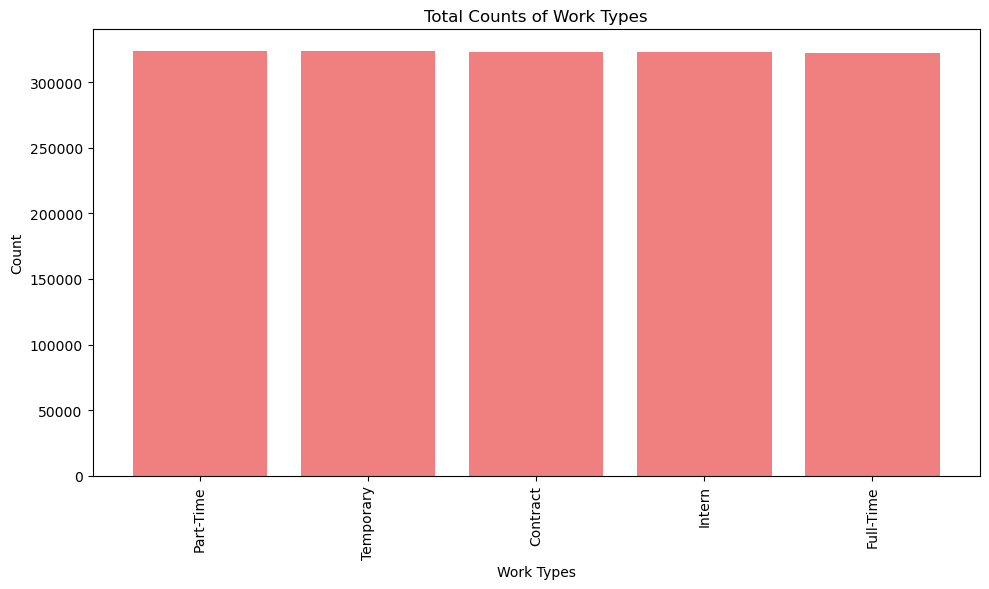

In [9]:
work_type_counts = df.groupBy("Work Type").count().orderBy(col("count").desc())

work_types = work_type_counts.count()
print("Total Number of Work Types:", work_types)
work_type_counts.show()

# Collect the data for all work types
all_work_types_data = work_type_counts.limit(work_type_counts.count()).rdd.collect()

# Extracting work type names and counts
work_types = [row["Work Type"] for row in all_work_types_data]
counts = [row["count"] for row in all_work_types_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(work_types, counts, color='lightcoral')
plt.xlabel('Work Types')
plt.ylabel('Count')
plt.title('Total Counts of Work Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The table presents the distribution of job postings based on different work types. Among five types of categories, "Part-Time" positions have the highest frequency, followed closely by "Temporary" roles. "Contract" positions are slightly less common, while "Intern" roles have a similar count to contracts. "Full-Time" positions, although substantial, are the least prevalent among the listed work types. This breakdown offers insights into the diversity of job opportunities based on work arrangements available in the dataset.

## Job Portal 

Total Number of Job Portals: 16


+-------------------+------+
|         Job Portal| count|
+-------------------+------+
|           FlexJobs|129879|
|Stack Overflow Jobs|129379|
|       Jobs2Careers|129245|
|           Snagajob|129088|
|            USAJOBS|129066|
|        SimplyHired|129059|
|           The Muse|129033|
|           Idealist|128952|
|    Internships.com|128790|
|            Monster| 65058|
|               Dice| 64927|
|       ZipRecruiter| 64805|
|             Indeed| 64776|
|      CareerBuilder| 64752|
|           LinkedIn| 64664|
|          Glassdoor| 64467|
+-------------------+------+



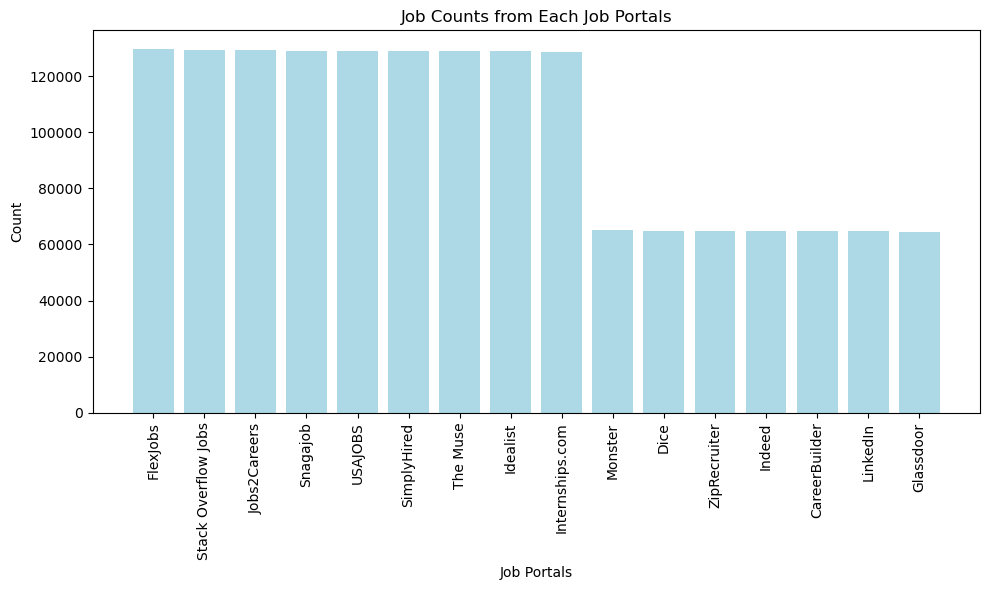

In [10]:
portal_counts = df.groupBy("Job Portal").count().orderBy(col("count").desc())
portal_types = portal_counts.count()
print("Total Number of Job Portals:", portal_types)
portal_counts.show()

# Collect the data for all job portals
all_portals_data = portal_counts.limit(portal_counts.count()).rdd.collect()

# Extracting portal names and counts
portals = [row["Job Portal"] for row in all_portals_data]
counts = [row["count"] for row in all_portals_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(portals, counts, color='lightblue')
plt.xlabel('Job Portals')
plt.ylabel('Count')
plt.title('Job Counts from Each Job Portals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The job portal distribution reveals significant variations in the number of job postings across different platforms.Among 16 different types of portals, FlexJobs, Stack Overflow Jobs, and Jobs2Careers are the top three portals with the highest number of job postings, each exceeding 129,000. On the other hand, Glassdoor, LinkedIn, and CareerBuilder have comparatively lower counts, ranging between 64,000 to 64,800. The disparities in posting frequencies suggest varying popularity and effectiveness among job seekers and employers across these platforms. Companies might prioritize portals with higher posting volumes to maximize exposure and reach a broader talent pool, while job seekers may concentrate their efforts on platforms where job opportunities are most abundant. Understanding these trends can inform recruitment strategies and help optimize the job search process for both employers and candidates.

## Preference

+----------+------+
|Preference| count|
+----------+------+
|      Male|539167|
|      Both|538437|
|    Female|538336|
+----------+------+



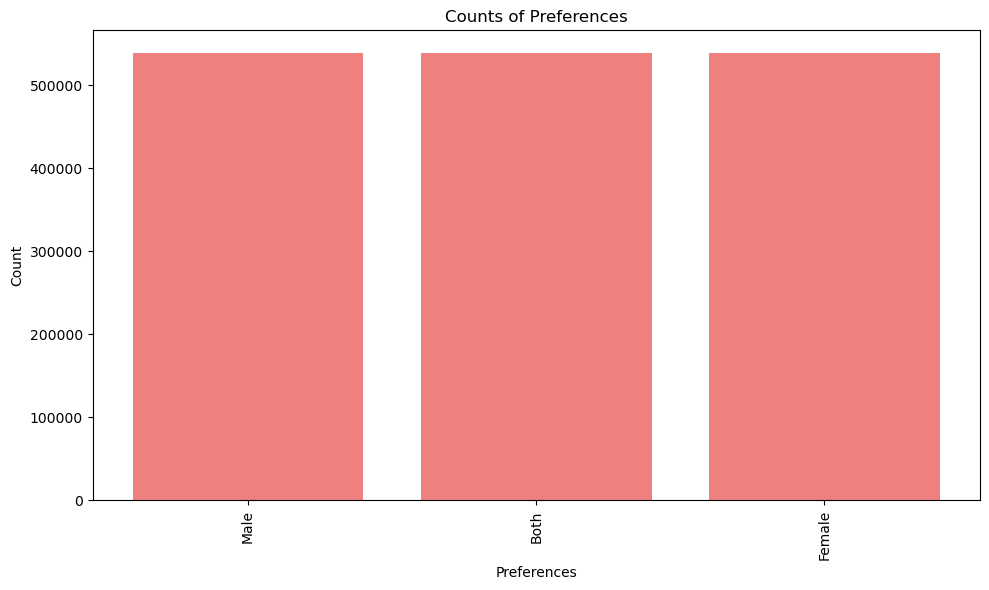

In [11]:
preference_counts = df.groupBy("Preference").count().orderBy(col("count").desc())
preference_counts.show()

# Collecting the data for all preferences
all_preferences_data = preference_counts.limit(preference_counts.count()).rdd.collect()

# Extracting preference names and counts
preferences = [row["Preference"] for row in all_preferences_data]
counts = [row["count"] for row in all_preferences_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(preferences, counts, color='lightcoral')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.title('Counts of Preferences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The table illustrates the distribution of job preferences among genders. Surprisingly, there's a near-equal split among the preferences, with "Male," "Female," and "Both" categories having similar counts. This parity suggests that job opportunities in the dataset are fairly balanced in terms of gender preferences, catering to a diverse range of candidates regardless of gender identity.